In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
Path.ls = lambda self: list(self.glob('*'))

In [3]:
PATH = Path('../input'); PATH.ls()

[PosixPath('../input/train'),
 PosixPath('../input/test'),
 PosixPath('../input/train_relationships.csv'),
 PosixPath('../input/sample_submission.csv')]

In [4]:
relationships_df = pd.read_csv(PATH/'train_relationships.csv')
relationships_df.head()

,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4


Plot some images

In [21]:
def ceil(a, b):
    c = math.ceil(a/b)
    return c if c * b == a else c+1

def plot_imgs(path, ids, rows=3):
    fig = plt.figure(figsize=(10, 10))
    for i, id in enumerate(ids):
        ax = fig.add_subplot(rows, ceil(len(ids), rows), i+1)
        ax.axis('off')
        imdata = plt.imread(path/id)
        plt.imshow(imdata)
        plt.title(label=id)

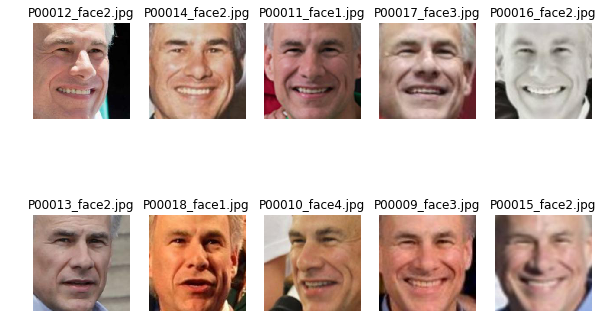

In [25]:
F0002_MID1 = (PATH/'train'/'F0002/MID1')
imgs = list(map(lambda p: p.name, F0002_MID1.ls()))
plot_imgs(F0002_MID1, imgs)

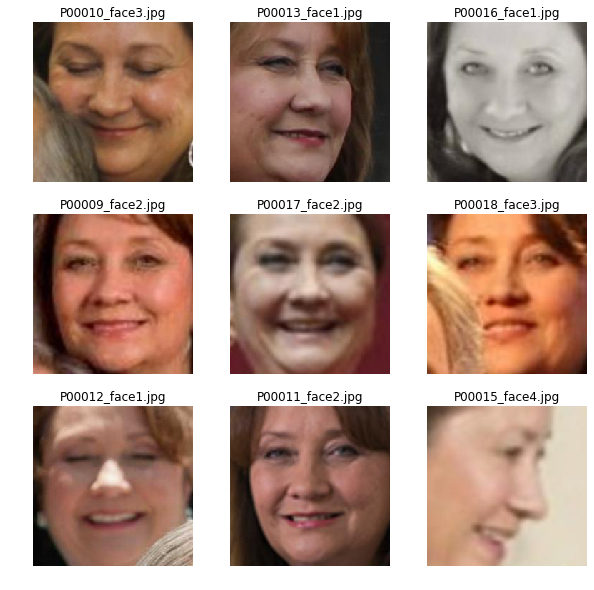

In [27]:
F0002_MID2 = (PATH/'train'/'F0002/MID2')
imgs = list(map(lambda p: p.name, F0002_MID2.ls()))
plot_imgs(F0002_MID2, imgs)

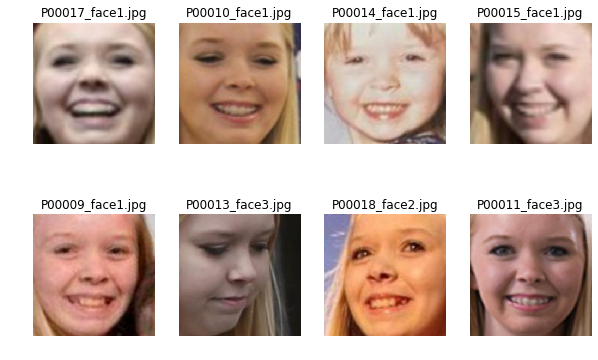

In [28]:
F0002_MID3 = (PATH/'train'/'F0002/MID3')
imgs = list(map(lambda p: p.name, F0002_MID3.ls()))
plot_imgs(F0002_MID3, imgs)

Histogram of number of relationships

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc14b8a4390>]],
      dtype=object)

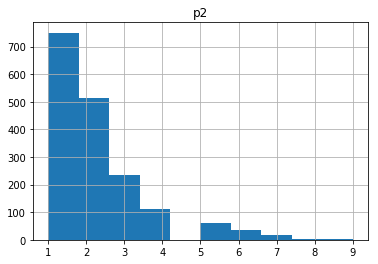

In [29]:
relationships_df.groupby('p1').count().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc147e36c50>]],
      dtype=object)

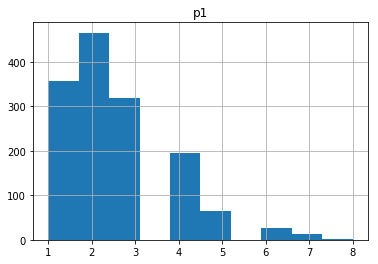

In [30]:
relationships_df.groupby('p2').count().hist()

In [31]:
relationships_df.head()

,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4


In [32]:
counts = 2
counts_df = relationships_df.groupby('p1').agg({'p2': 'count'})
counts_mask = counts_df['p2']>counts
img_ids = counts_mask.axes[0].values
img_ids[:10]

array(['F0002/MID1', 'F0002/MID2', 'F0005/MID1', 'F0005/MID3',
       'F0009/MID1', 'F0009/MID2', 'F0009/MID3', 'F0009/MID4',
       'F0009/MID5', 'F0009/MID7'], dtype=object)

To be continued.